In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
%matplotlib inline

In [46]:
df = pd.read_csv("canada_per_capita_income.csv")
df.head()

,year,per capita income (US$)
0,<1970,3399.299037
1,1971,NaN
2,1972,4251.175484
3,1973,4804.463248
4,1974,5576.514583


### Data Wrangling

In [47]:
df.isnull().sum()

year                       0
per capita income (US$)    2
dtype: int64

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47 entries, 0 to 46
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   year                     47 non-null     object 
 1   per capita income (US$)  45 non-null     float64
dtypes: float64(1), object(1)
memory usage: 880.0+ bytes


In [53]:
df = df.interpolate(method='linear')

In [54]:
df

,year,per capita income (US$)
0,<1970,3399.299037
1,1971,3825.237261
2,1972,4251.175484
3,1973,4804.463248
4,1974,5576.514583
5,1975,5998.144346
6,1976,7062.131392
7,1977,7155.049214
8,1978,7247.967035
9,1979,7602.912681


In [55]:
df.isnull().sum()

year                       0
per capita income (US$)    0
dtype: int64

In [57]:
df.head()

,year,per capita income (US$)
0,<1970,3399.299037
1,1971,3825.237261
2,1972,4251.175484
3,1973,4804.463248
4,1974,5576.514583


In [71]:
df.rename(columns={'per capita income (US$)':'per_cap_inc'},inplace=True)

In [72]:
df.head()

,year,Per_cap_inc
0,<1970,3399.299037
1,1971,3825.237261
2,1972,4251.175484
3,1973,4804.463248
4,1974,5576.514583


In [77]:
df =df.replace({
    'year':'[<]'
},'',regex=True)
df.head()

,year,Per_cap_inc
0,1970,3399.299037
1,1971,3825.237261
2,1972,4251.175484
3,1973,4804.463248
4,1974,5576.514583


In [81]:
x =df.year
y = df.Per_cap_inc
x.head()

0    1970
1    1971
2    1972
3    1973
4    1974
Name: year, dtype: object

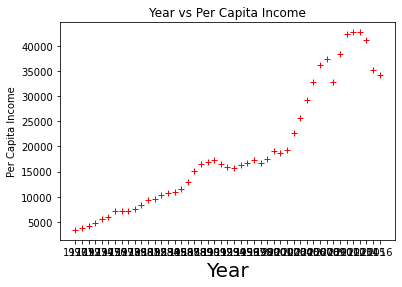

In [86]:
plt.xlabel('Year',fontsize=20)
plt.ylabel('Per Capita Income' )
plt.title('Year vs Per Capita Income')
plt.plot(x,y,"r+")

In [88]:
leb= df.drop('Per_cap_inc',axis='columns')

In [89]:
inc = y

In [91]:
reg = linear_model.LinearRegression()
reg.fit(leb,inc)

LinearRegression()

In [104]:
testdf = pd.DataFrame({
    'year' :[2017,2018,2019,2025,2030]
})
testdf

,year
0,2017
1,2018
2,2019
3,2025
4,2030


In [105]:
pred_df =pd.DataFrame({
    'Per_cap_inc':reg.predict(testdf)})
pred_df

,Per_cap_inc
0,38799.763747
1,39627.982356
2,40456.200966
3,45425.512624
4,49566.605673


In [106]:
df.tail()

,year,Per_cap_inc
42,2012,42665.25597
43,2013,42676.46837
44,2014,41039.89360
45,2015,35175.18898
46,2016,34229.19363


In [108]:
result_df = pd.concat([testdf,pred_df] , axis=1)
result_df

,year,Per_cap_inc
0,2017,38799.763747
1,2018,39627.982356
2,2019,40456.200966
3,2025,45425.512624
4,2030,49566.605673


In [115]:
t =pd.concat([df,result_df],ignore_index=True)
t

,year,Per_cap_inc
0,1970,3399.299037
1,1971,3825.237261
2,1972,4251.175484
3,1973,4804.463248
4,1974,5576.514583
5,1975,5998.144346
6,1976,7062.131392
7,1977,7155.049214
8,1978,7247.967035
9,1979,7602.912681


In [116]:
reg.coef_

array([828.2186097])

In [117]:
reg.intercept_

-1631717.1720144658

**Y = m*x + b**

TypeError: 'value' must be an instance of str or bytes, not a int

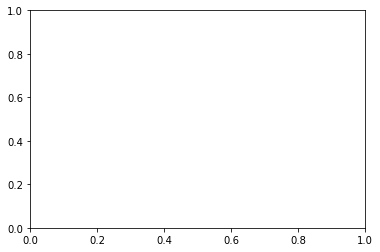

In [118]:
plt.plot(t.year , t.Per_cap_inc)